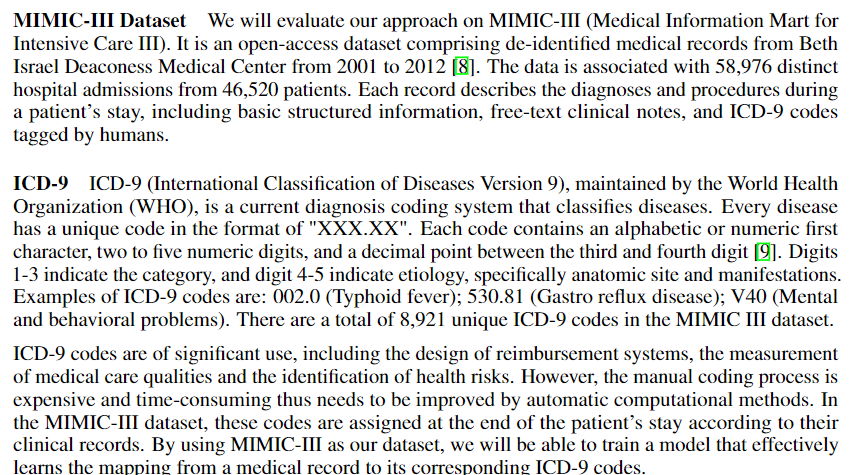

In [1]:
import numpy as np
import pandas as pd
import os 
import sys
import warnings
warnings.filterwarnings("ignore")

In [2]:
noteevents=pd.read_csv(r'data\NOTEEVENTS.csv')
diagnoses_icd=pd.read_csv(r'D:\FINALYEARPROJECTREC\data\DIAGNOSES_ICD.csv')
procedure_icd=pd.read_csv(r'data\PROCEDURES_ICD.csv')
d_icd_diagnoses=pd.read_csv(r'data\D_ICD_DIAGNOSES (3).csv')
d_icd_procedure=pd.read_csv(r'data\D_ICD_PROCEDURES.csv')

In [3]:
## Preprocessing on Given Data:

noteevents.columns=noteevents.columns.str.upper()
procedure_icd.columns=procedure_icd.columns.str.upper()
diagnoses_icd.columns=diagnoses_icd.columns.str.upper()
d_icd_procedure.columns=d_icd_procedure.columns.str.upper()
d_icd_diagnoses.columns=d_icd_diagnoses.columns.str.upper()
procedure_icd['ROW_ID']=procedure_icd['OW_ID']
procedure_icd.drop(['OW_ID'],axis=1,inplace=True)
procedure_icd.head(2)

,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,ROW_ID
0,10114,167957,1,3605,3994
1,10114,167957,2,3722,3995


In [4]:
noteevents.head(2)

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,776,20007,188442.0,2183-10-29 00:00:00,Discharge summary,Report,NaN,NaN,Admission Date: [**2183-9-25**] Dischar...
1,777,20007,193793.0,2184-01-20 00:00:00,Discharge summary,Report,NaN,NaN,Admission Date: [**2184-1-16**] Dischar...


In [5]:
diagnoses_icd.head(2)

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486


In [6]:
d_icd_diagnoses.head(1)

,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE
0,174,01166,TB pneumonia-oth test,"Tuberculous pneumonia [any form], tubercle bac..."


In [7]:
d_icd_diagnoses.head(2)

,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE
0,174,01166,TB pneumonia-oth test,"Tuberculous pneumonia [any form], tubercle bac..."
1,175,01170,TB pneumothorax-unspec,"Tuberculous pneumothorax, unspecified"


In [8]:
d_icd_procedure.head(2)

,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE
0,264,851,Canthotomy,Canthotomy
1,265,852,Blepharorrhaphy,Blepharorrhaphy


In [9]:
notes=noteevents[['ROW_ID','SUBJECT_ID','HADM_ID','CHARTDATE','CATEGORY','TEXT']]
diagnoses_icd=diagnoses_icd[['ROW_ID'	,'SUBJECT_ID',	'HADM_ID','ICD9_CODE']]
d_icd_diagnoses=d_icd_diagnoses[['ROW_ID','ICD9_CODE','SHORT_TITLE','LONG_TITLE']]
procedure_icd=procedure_icd[['ROW_ID','SUBJECT_ID','HADM_ID','ICD9_CODE']]
d_icd_procedure=d_icd_procedure[['ROW_ID','ICD9_CODE','SHORT_TITLE'	,'LONG_TITLE']]


In [13]:
## Merging Table:
merged_diagnoses=pd.merge(diagnoses_icd,d_icd_diagnoses,on='ICD9_CODE',how='inner')
merged_procedure=pd.merge(procedure_icd,d_icd_procedure,on='ICD9_CODE',how='inner')
final_merged=pd.merge(notes,merged_diagnoses,on=['SUBJECT_ID','HADM_ID'],how='inner')
final_merged=pd.merge(final_merged,merged_procedure,on=['SUBJECT_ID','HADM_ID'],how='inner')

In [15]:
merged_diagnoses

,ROW_ID_x,SUBJECT_ID,HADM_ID,ICD9_CODE,ROW_ID_y,SHORT_TITLE,LONG_TITLE
0,1297,109,172335,40301,4312,Mal hyp kid w cr kid V,"Hypertensive chronic kidney disease, malignant..."
1,1311,109,173633,40301,4312,Mal hyp kid w cr kid V,"Hypertensive chronic kidney disease, malignant..."
2,1019,109,131345,40301,4312,Mal hyp kid w cr kid V,"Hypertensive chronic kidney disease, malignant..."
3,1039,109,131376,40301,4312,Mal hyp kid w cr kid V,"Hypertensive chronic kidney disease, malignant..."
4,1059,109,135923,40301,4312,Mal hyp kid w cr kid V,"Hypertensive chronic kidney disease, malignant..."
...,...,...,...,...,...,...,...
634704,650539,99873,143544,2982,2611,Reactive confusion,Reactive confusion
634705,640080,97547,112445,E9399,13518,Adv eff psychotropic NOS,Unspecified psychotropic agent causing adverse...
634706,639100,97339,198692,E0070,9621,Tackle football,Activities involving american tackle football
634707,631728,95806,167169,6940,7520,Dermatitis herpetiformis,Dermatitis herpetiformis


In [14]:
final_merged

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CATEGORY,TEXT,ROW_ID_x_x,ICD9_CODE_x,ROW_ID_y_x,SHORT_TITLE_x,LONG_TITLE_x,ROW_ID_x_y,ICD9_CODE_y,ROW_ID_y_y,SHORT_TITLE_y,LONG_TITLE_y
0,794,40601,182879.0,2184-08-10 00:00:00,Discharge summary,Admission Date: [**2184-8-4**] D...,381784,41401,4374,Crnry athrscl natve vssl,Coronary atherosclerosis of native coronary ar...,184969,8856,3219,Coronar arteriogr-2 cath,Coronary arteriography using two catheters
1,794,40601,182879.0,2184-08-10 00:00:00,Discharge summary,Admission Date: [**2184-8-4**] D...,381784,41401,4374,Crnry athrscl natve vssl,Coronary atherosclerosis of native coronary ar...,184970,3893,801,Venous cath NEC,"Venous catheterization, not elsewhere classified"
2,794,40601,182879.0,2184-08-10 00:00:00,Discharge summary,Admission Date: [**2184-8-4**] D...,381784,41401,4374,Crnry athrscl natve vssl,Coronary atherosclerosis of native coronary ar...,184968,3723,806,Rt/left heart card cath,Combined right and left heart cardiac catheter...
3,794,40601,182879.0,2184-08-10 00:00:00,Discharge summary,Admission Date: [**2184-8-4**] D...,381782,5990,6376,Urin tract infection NOS,"Urinary tract infection, site not specified",184969,8856,3219,Coronar arteriogr-2 cath,Coronary arteriography using two catheters
4,794,40601,182879.0,2184-08-10 00:00:00,Discharge summary,Admission Date: [**2184-8-4**] D...,381782,5990,6376,Urin tract infection NOS,"Urinary tract infection, site not specified",184970,3893,801,Venous cath NEC,"Venous catheterization, not elsewhere classified"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918578,1395180,10098,180685.0,2170-12-03 00:00:00,Nursing/other,Respiratory Care Apnea test start at 1510 pt r...,113206,E8495,10956,Accid on street/highway,Street and highway accidents,97151,8659,3487,Skin closure NEC,Closure of skin and subcutaneous tissue of oth...
918579,1395180,10098,180685.0,2170-12-03 00:00:00,Nursing/other,Respiratory Care Apnea test start at 1510 pt r...,113203,80375,9100,Opn skl fx NEC-deep coma,"Other open skull fracture with subarachnoid, s...",97150,3893,801,Venous cath NEC,"Venous catheterization, not elsewhere classified"
918580,1395180,10098,180685.0,2170-12-03 00:00:00,Nursing/other,Respiratory Care Apnea test start at 1510 pt r...,113203,80375,9100,Opn skl fx NEC-deep coma,"Other open skull fracture with subarachnoid, s...",97149,3891,799,Arterial catheterization,Arterial catheterization
918581,1395180,10098,180685.0,2170-12-03 00:00:00,Nursing/other,Respiratory Care Apnea test start at 1510 pt r...,113203,80375,9100,Opn skl fx NEC-deep coma,"Other open skull fracture with subarachnoid, s...",97148,118,125,Other brain dx procedure,Other diagnostic procedures on brain and cereb...


## NOTEEVENTS can be joined with DIAGNOSE_ICD and PROCEDURE_ICD using the HADM_ID column.
## DIAGNOSE_ICD can be joined with D_ICD_DIAGNOSE using the ICD9_CODE column.
## PROCEDURE_ICD can be joined with D_ICD_PROCEDURE using the ICD9_CODE column.
